In [32]:
import statsmodels.api as sm
import requests as req
from bs4 import BeautifulSoup
import pandas as pd
import traceback
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

Linear-regression 참고사이트 : http://hleecaster.com/ml-linear-regression-example/

### 화물-주가 그래프
Source : 국도교통부 항공통계

### 대한항공주가

In [563]:
url = "https://www.investing.com/instruments/HistoricalDataAjax"
head = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36',
    'X-Requested-With': 'XMLHttpRequest'
}
payload = {
    'curr_id': '43514',
'smlID': '1312682',
'header': '003490 Historical Data',
'st_date': '01/01/2010',
'end_date': '12/31/2019',
'interval_sec': 'Monthly',
'sort_col': 'date',
'sort_ord': 'DESC',
'action': 'historical_data',
}
data = req.post(url, headers = head, data = payload)
data.status_code
raw1 = BeautifulSoup(data.text)
yraw1 = pd.read_html(str(raw1.find('table')))[0]
ypot = yraw1['Price']
y1raw = ypot.values
yraw1.to_excel(excel_writer=r'C:\Users\com\MSB535\data\대한항공주가.xlsx')
#13년 8월 주가정보 없음.

### 아시아나항공주가

In [564]:
url = "https://www.investing.com/instruments/HistoricalDataAjax"
head = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36',
    'X-Requested-With': 'XMLHttpRequest'
}
payload = {
    'curr_id': '43898',
'header': '020560 Historical Data',
'st_date': '01/01/2010',
'end_date': '12/31/2019',
'interval_sec': 'Monthly',
'sort_col': 'date',
'sort_ord': 'DESC',
'action': 'historical_data',
}
data = req.post(url, headers = head, data = payload)
data.status_code
raw1 = BeautifulSoup(data.text)
yraw2 = pd.read_html(str(raw1.find('table')))[0]
y2pot = yraw2['Price']
y2raw = y2pot.values
#13년 8월 주가정보 없음
yraw2.to_excel(excel_writer=r'C:\Users\com\MSB535\data\아시아나주가.xlsx')

In [159]:
raw = pd.read_excel(r'C:\Users\com\[MSB535]\data\화물.xlsx', index_col = 0)

In [160]:
x1raw = raw.loc['대한항공(KAL)']['화물(톤)']
x1r = sm.add_constant(x1raw,has_constant='add')
x1r = x1r[::-1]
x1r = x1r.reset_index()
x1r = x1r.drop(labels = 'index', axis = 1)
len(x1r)

120

In [161]:
np.where(0==x1r['화물(톤)'].values)

(array([20], dtype=int64),)

In [162]:
x1c = x1r.drop([x1r.index[20],x1r.index[75]])

In [231]:
yraw1 = pd.read_excel(r'C:\Users\com\[MSB535]\data\대한항공주가.xlsx', index_col = 0)
ypot = yraw1['Price']
y1 = ypot.values

In [232]:
y1 = np.delete(y1,20)
y1 = np.delete(y1,75)

In [165]:
x1cv= x1c['화물(톤)'].values

In [166]:
line1 = LinearRegression()
line1.fit(x1cv.reshape(-1,1),y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

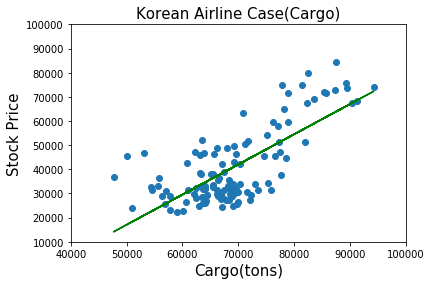

In [167]:
plt.plot(x1values, y1, 'o')
plt.plot(x1values,line1.predict(x1cv.reshape(-1,1)), color = 'green')
plt.title('Korean Airline Case(Cargo)', fontsize = 15)
plt.xlabel('Cargo(tons)', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.axis([40000,100000,10000,100000])
plt.show()

In [168]:
model1 = sm.OLS(y1,x1)
result=model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     133.4
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           5.23e-21
Time:                        23:52:51   Log-Likelihood:                -1260.5
No. Observations:                 118   AIC:                             2525.
Df Residuals:                     116   BIC:                             2531.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.532e+04   7514.483     -6.031      0.000   -6.02e+04   -3.04e+04
화물(톤)          1.2477      0.108     11.551      0.000       1.034       1.462
==============================================================================
Omnibus:                        6.093   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                6.071
Skew:                           0.515   Prob(JB):                       0.0480
Kurtosis:                       2.582   Cond. No.                     5.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [170]:
x1raw = raw.loc['대한항공(KAL)']['운항(편)']
x1r = sm.add_constant(x1raw,has_constant='add')
x1r = x1r[::-1]
x1r = x1r.reset_index()
x1r = x1r.drop(labels = 'index', axis = 1)
xn1 = x1r.drop([x1r.index[20],x1r.index[75]])
xn1cv= xn1['운항(편)'].values

In [171]:
line11 = LinearRegression()
line11.fit(xn1cv.reshape(-1,1),y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

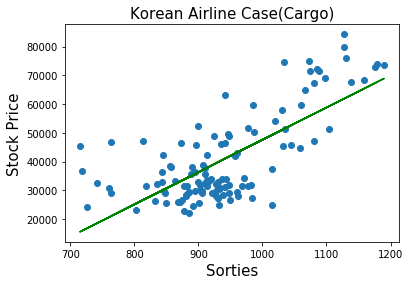

In [172]:
plt.plot(xn1cv, y1, 'o')
plt.plot(xn1cv,line11.predict(xn1cv.reshape(-1,1)), color = 'green')
plt.title('Korean Airline Case(Cargo)', fontsize = 15)
plt.xlabel('Sorties', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
#plt.axis([30000,100000,10000,100000])
plt.show()

In [173]:
model2 = sm.OLS(y1,xn1)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     125.6
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           3.38e-20
Time:                        23:54:20   Log-Likelihood:                -1262.4
No. Observations:                 118   AIC:                             2529.
Df Residuals:                     116   BIC:                             2534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.481e+04   9470.598     -6.843      0.000   -8.36e+04   -4.61e+04
운항(편)        112.3626     10.027     11.206      0.000      92.503     132.222
==============================================================================
Omnibus:                        5.426   Durbin-Watson:                   0.793
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.546
Skew:                           0.510   Prob(JB):                       0.0625
Kurtosis:                       2.705   Cond. No.                     8.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [180]:
x1raw = raw.loc['아시아나항공(AAR)']['화물(톤)']
x1r = sm.add_constant(x1raw,has_constant='add')
x1r = x1r[::-1]
x1r = x1r.reset_index()
x1r = x1r.drop(labels = 'index', axis = 1)
x2 = x1r.drop([x1r.index[20]])
x2cv= x2['화물(톤)'].values

In [181]:
x1raw = raw.loc['아시아나항공(AAR)']['운항(편)']
x1r = sm.add_constant(x1raw,has_constant='add')
x1r = x1r[::-1]
x1r = x1r.reset_index()
x1r = x1r.drop(labels = 'index', axis = 1)
xn2 = x1r.drop([x1r.index[20]])
xn2cv= xn2['운항(편)'].values

In [230]:
yraw2 = pd.read_excel(r'C:\Users\com\[MSB535]\data\아시아나주가.xlsx', index_col = 0)
ypot = yraw2['Price']
y2 = ypot.values
y2 = np.delete(y2,20)

In [189]:
line2 = LinearRegression()
line2.fit(x2cv.reshape(-1,1),y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

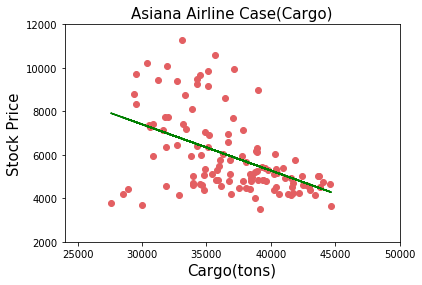

In [190]:
plt.plot(x2cv, y2, 'o',color = '#e35f62')
plt.plot(x2cv,line2.predict(x2cv.reshape(-1,1)), color = 'green')
plt.title('Asiana Airline Case(Cargo)', fontsize = 15)
plt.xlabel('Cargo(tons)', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.axis([24000,50000,2000,12000])
plt.show()

In [191]:
model3 = sm.OLS(y2,x2)
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     34.07
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           4.85e-08
Time:                        23:58:56   Log-Likelihood:                -1047.0
No. Observations:                 119   AIC:                             2098.
Df Residuals:                     117   BIC:                             2104.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.378e+04   1349.045     10.214      0.000    1.11e+04    1.65e+04
화물(톤)         -0.2125      0.036     -5.837      0.000      -0.285      -0.140
==============================================================================
Omnibus:                        8.865   Durbin-Watson:                   0.350
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.099
Skew:                           0.536   Prob(JB):                       0.0106
Kurtosis:                       3.829   Cond. No.                     3.37e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [192]:
line12 = LinearRegression()
line12.fit(xn2cv.reshape(-1,1),y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

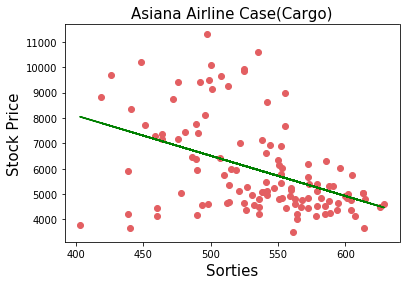

In [193]:
plt.plot(xn2cv, y2, 'o',color = '#e35f62')
plt.plot(xn2cv,line12.predict(xn2cv.reshape(-1,1)), color = 'green')
plt.title('Asiana Airline Case(Cargo)', fontsize = 15)
plt.xlabel('Sorties', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
#plt.axis([24000,50000,2000,12000])
plt.show()

In [194]:
model4 = sm.OLS(y2,xn2)
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     27.75
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           6.38e-07
Time:                        23:59:24   Log-Likelihood:                -1049.5
No. Observations:                 119   AIC:                             2103.
Df Residuals:                     117   BIC:                             2109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.444e+04   1618.566      8.922      0.000    1.12e+04    1.76e+04
운항(편)        -15.8552      3.010     -5.267      0.000     -21.817      -9.894
==============================================================================
Omnibus:                        9.823   Durbin-Watson:                   0.340
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.085
Skew:                           0.593   Prob(JB):                      0.00646
Kurtosis:                       3.793   Cond. No.                     5.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [255]:
x1 = x1cv/np.mean(x1cv)
x2 = x2cv/np.mean(x2cv)
y1 = y1/np.mean(y1)
y2 = y2/np.mean(y2)
xcum = np.concatenate([x1,x2], axis = None)
yyy = np.concatenate([y1,y2], axis = None)
xxx = pd.DataFrame({'화물(톤)' : xcum})
xxx = sm.add_constant(xxx,has_constant='add')
xxxv = xxx['화물(톤)'].values

In [256]:
line14 = LinearRegression()
line14.fit(xxxv.reshape(-1,1),yyy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Stock Price')

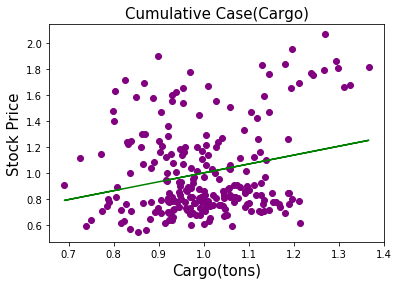

In [257]:
plt.plot(xxxv, yyy, 'o', c = 'purple')
plt.plot(xxxv,line14.predict(xxxv.reshape(-1,1)), color = 'green')
plt.title('Cumulative Case(Cargo)', fontsize = 15)
plt.xlabel('Cargo(tons)', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)

In [258]:
model5 = sm.OLS(yyy,xxx)
result5=model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     14.56
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           0.000174
Time:                        00:15:16   Log-Likelihood:                -76.608
No. Observations:                 237   AIC:                             157.2
Df Residuals:                     235   BIC:                             164.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3143      0.181      1.736      0.084      -0.042       0.671
화물(톤)          0.6857      0.180      3.815      0.000       0.332       1.040
==============================================================================
Omnibus:                       28.411   Durbin-Watson:                   0.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.284
Skew:                           0.957   Prob(JB):                     1.32e-08
Kurtosis:                       2.880   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
xn1 = xn1cv/np.mean(xn1cv)
xn2 = xn2cv/np.mean(xn2cv)
xcum = np.concatenate([x1,x2], axis = None)
yyy = np.concatenate([y1,y2], axis = None)
xxx = pd.DataFrame({'운항(편)' : xcum})
xxxn = sm.add_constant(xxx,has_constant='add')
xxxnv = xxxn['운항(편)'].values

In [261]:
print(len(xxxn),len(yyy))

237 237


In [263]:
line13 = LinearRegression()
line13.fit(xxxnv.reshape(-1,1),yyy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Stock Price')

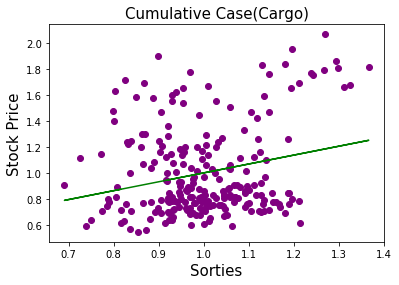

In [264]:
plt.plot(xxxnv, yyy, 'o',c = 'purple')
plt.plot(xxxnv,line13.predict(xxxnv.reshape(-1,1)), color = 'green')
plt.title('Cumulative Case(Cargo)', fontsize = 15)
plt.xlabel('Sorties', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)

In [266]:
model4 = sm.OLS(yyy,xxxn)
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     14.56
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           0.000174
Time:                        00:18:05   Log-Likelihood:                -76.608
No. Observations:                 237   AIC:                             157.2
Df Residuals:                     235   BIC:                             164.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3143      0.181      1.736      0.084      -0.042       0.671
운항(편)          0.6857      0.180      3.815      0.000       0.332       1.040
==============================================================================
Omnibus:                       28.411   Durbin-Watson:                   0.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.284
Skew:                           0.957   Prob(JB):                     1.32e-08
Kurtosis:                       2.880   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 공급(석)-주가 그래프
Source : 국도교통부 항공통계

In [520]:
yraw1 = pd.read_excel(r'C:\Users\com\[MSB535]\data\대한항공주가.xlsx', index_col = 0)
ypot = yraw1['Price']
yy1 = ypot.values

In [521]:
raw2 = pd.read_excel(r'C:\Users\com\[MSB535]\data\여객.xlsx', index_col = 0)

In [522]:
x1raw = raw2.loc['대한항공(KAL)']['여객(명)']
x1r = sm.add_constant(x1raw,has_constant='add')
x1r = x1r[::-1]
x1r = x1r.reset_index()
x1r = x1r.drop(labels = 'index', axis = 1)
#xx1p = x1r.drop([x1r.index[80]])
xx1p = x1r.drop([x1r.index[20],x1r.index[76],x1r.index[83]])
xx1pv=  xx1p['여객(명)'].values

C:\Users\com\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [523]:
len(xx1pv)
##18년 4월, 13년 1월 자료 없음

117

In [524]:
yy1 = np.delete(y1,20)
yy1 = np.delete(yy1,75)
yy1 = np.delete(yy1,81)
len(yy1)

117

In [525]:
line3 = LinearRegression()
line3.fit(xx1pv.reshape(-1,1),yy1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Korean Airline Case(Passenger)')

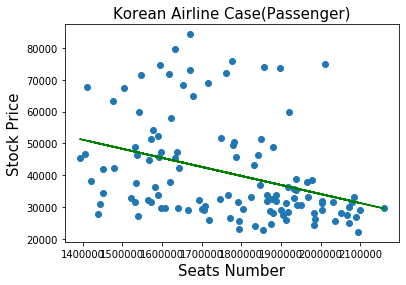

In [526]:
plt.plot(xx1pv, yy1, 'o')
plt.plot(xx1pv,line3.predict(xx1pv.reshape(-1,1)), color = 'green')
plt.xlabel('Seats Number', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.title('Korean Airline Case(Passenger)', fontsize = 15)
#plt.axis([1200000, 2200000,10000,100000])

In [527]:
model5 = sm.OLS(yy1,xx1p)
result5=model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     16.67
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           8.24e-05
Time:                        00:56:11   Log-Likelihood:                -1287.1
No. Observations:                 117   AIC:                             2578.
Df Residuals:                     115   BIC:                             2584.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.091e+04   1.24e+04      7.346      0.000    6.64e+04    1.15e+05
여객(명)         -0.0284      0.007     -4.083      0.000      -0.042      -0.015
==============================================================================
Omnibus:                       22.507   Durbin-Watson:                   0.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.363
Skew:                           1.160   Prob(JB):                     6.93e-07
Kurtosis:                       3.659   Cond. No.                     1.63e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [528]:
x1raw = raw2.loc['대한항공(KAL)']['운항(편)']
x1r = sm.add_constant(x1raw,has_constant='add')
x1r = x1r[::-1]
x1r = x1r.reset_index()
x1r = x1r.drop(labels = 'index', axis = 1)
xxn1p = x1r.drop([x1r.index[20],x1r.index[76],x1r.index[83]])
xxn1pv=  xxn1p['운항(편)'].values

C:\Users\com\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [529]:
yraw1 = pd.read_excel(r'C:\Users\com\[MSB535]\data\대한항공주가.xlsx', index_col = 0)
ypot = yraw1['Price']
y1 = ypot.values

In [530]:
line15 = LinearRegression()
line15.fit(xxn1pv.reshape(-1,1),yy1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Korean Airline Case(Passenger)')

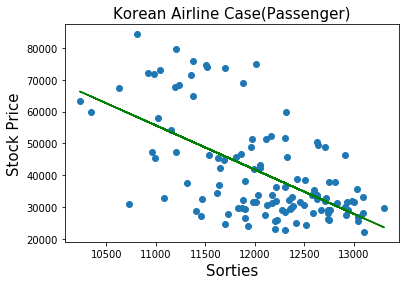

In [531]:
plt.plot(xxn1pv, yy1, 'o')
plt.plot(xxn1pv,line15.predict(xxn1pv.reshape(-1,1)), color = 'green')
plt.xlabel('Sorties', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.title('Korean Airline Case(Passenger)', fontsize = 15)

In [532]:
model6 = sm.OLS(yy1,xxn1p)
result6=model6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     63.97
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           1.10e-12
Time:                        00:56:13   Log-Likelihood:                -1269.1
No. Observations:                 117   AIC:                             2542.
Df Residuals:                     115   BIC:                             2548.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.086e+05    2.1e+04      9.921      0.000    1.67e+05     2.5e+05
운항(편)        -13.9026      1.738     -7.998      0.000     -17.346     -10.460
==============================================================================
Omnibus:                        4.915   Durbin-Watson:                   0.630
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                4.850
Skew:                           0.497   Prob(JB):                       0.0885
Kurtosis:                       2.926   Cond. No.                     2.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [533]:
xx2raw = raw2.loc['아시아나항공(AAR)']['여객(명)']
xx2 = xx2raw.values
xx2 = np.flip(xx2)
##18년 4월, 13년 1월 자료 없음

In [534]:
x1raw = raw2.loc['아시아나항공(AAR)']['여객(명)']
x1r = sm.add_constant(x1raw,has_constant='add')
x1r = x1r[::-1]
x1r = x1r.reset_index()
x1r = x1r.drop(labels = 'index', axis = 1)
xx2p = x1r.drop([x1r.index[20],x1r.index[83]])
xx2pv=  xx2p['여객(명)'].values

C:\Users\com\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [535]:
yraw2 = pd.read_excel(r'C:\Users\com\[MSB535]\data\아시아나주가.xlsx', index_col = 0)
y2raw = yraw2['Price']
yy2 = y2raw.values

In [536]:
b = np.where(0==y2raw)
print(b)

(array([], dtype=int64),)


In [537]:
yy2 = np.delete(yy2,20)
yy2 = np.delete(yy2,82)

In [538]:
line4 = LinearRegression()
line4.fit(xx2pv.reshape(-1,1),yy2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[900000, 1700000, 2000, 13000]

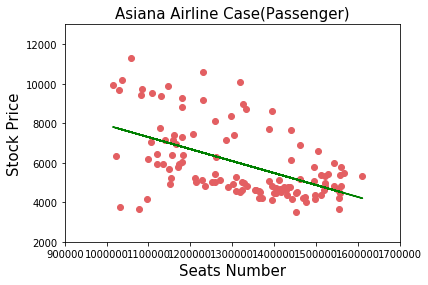

In [539]:
plt.plot(xx2pv, yy2, 'o',color = '#e35f62')
plt.plot(xx2pv,line4.predict(xx2pv.reshape(-1,1)), color = 'green')
plt.xlabel('Seats Number', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.title('Asiana Airline Case(Passenger)', fontsize = 15)
plt.axis([900000,1700000,2000,13000])

In [540]:
model7 = sm.OLS(yy2,xx2p)
result7=model7.fit()
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     43.91
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           1.13e-09
Time:                        00:56:24   Log-Likelihood:                -1034.8
No. Observations:                 118   AIC:                             2074.
Df Residuals:                     116   BIC:                             2079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.395e+04   1215.673     11.475      0.000    1.15e+04    1.64e+04
여객(명)         -0.0060      0.001     -6.626      0.000      -0.008      -0.004
==============================================================================
Omnibus:                        6.166   Durbin-Watson:                   0.406
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                5.939
Skew:                           0.547   Prob(JB):                       0.0513
Kurtosis:                       3.108   Cond. No.                     1.12e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [541]:
x1raw = raw2.loc['아시아나항공(AAR)']['운항(편)']
x1r = sm.add_constant(x1raw,has_constant='add')
x1r = x1r[::-1]
x1r = x1r.reset_index()
x1r = x1r.drop(labels = 'index', axis = 1)
xxn2p = x1r.drop([x1r.index[20],x1r.index[83]])
xxn2pv=  xxn2p['운항(편)'].values

C:\Users\com\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [542]:
len(xxn2pv)

118

In [543]:
len(yy2)

118

In [544]:
line6 = LinearRegression()
line6.fit(xxn2pv.reshape(-1,1),yy2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Asiana Airline Case(Passenger)')

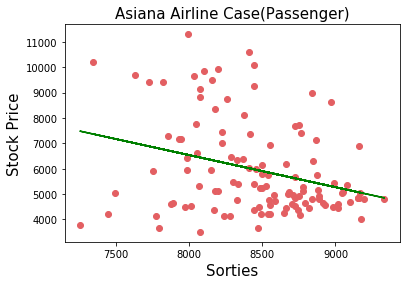

In [545]:
plt.plot(xxn2pv, yy2, 'o',color = '#e35f62')
plt.plot(xxn2pv,line6.predict(xxn2pv.reshape(-1,1)), color = 'green')
plt.xlabel('Sorties', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.title('Asiana Airline Case(Passenger)', fontsize = 15)

In [546]:
model7 = sm.OLS(yy2,xxn2p)
result7=model7.fit()
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     11.97
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           0.000757
Time:                        00:56:26   Log-Likelihood:                -1048.0
No. Observations:                 118   AIC:                             2100.
Df Residuals:                     116   BIC:                             2105.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.664e+04   3092.947      5.379      0.000    1.05e+04    2.28e+04
운항(편)         -1.2627      0.365     -3.460      0.001      -1.986      -0.540
==============================================================================
Omnibus:                        9.405   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.822
Skew:                           0.706   Prob(JB):                      0.00736
Kurtosis:                       3.070   Cond. No.                     1.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [547]:
xx1 = xx1pv/np.mean(xx1pv)
xx2 = xx2pv/np.mean(xx2pv)
yy1 = yy1/np.mean(yy1)
yy2 = yy2/np.mean(yy2)
xcum = np.concatenate([xx1,xx2], axis = None)
yyy2 = np.concatenate([yy1,yy2], axis = None)
xxx = pd.DataFrame({'여객(명)' : xcum})
xxx2p = sm.add_constant(xxx,has_constant='add')
xxx2pv = xxx2p['여객(명)'].values

C:\Users\com\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [548]:
line16 = LinearRegression()
line16.fit(xxx2pv.reshape(-1,1),yyy2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [549]:
len(yyy2)

235

Text(0, 0.5, 'Stock Price')

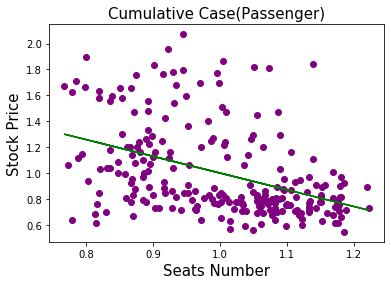

In [516]:
plt.plot(xxx2pv, yyy2, 'o', c = 'purple')
plt.plot(xxx2pv,line16.predict(xxx2pv.reshape(-1,1)), color = 'green')
plt.title('Cumulative Case(Passenger)', fontsize = 15)
plt.xlabel('Seats Number', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)

In [517]:
model7 = sm.OLS(yyy2,xxx2p)
result7=model7.fit()
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     52.83
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           5.46e-12
Time:                        00:53:26   Log-Likelihood:                -60.104
No. Observations:                 235   AIC:                             124.2
Df Residuals:                     233   BIC:                             131.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2941      0.179     12.801      0.000       1.941       2.647
여객(명)         -1.2941      0.178     -7.268      0.000      -1.645      -0.943
==============================================================================
Omnibus:                       36.140   Durbin-Watson:                   0.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.910
Skew:                           1.019   Prob(JB):                     3.95e-11
Kurtosis:                       3.858   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [550]:
xn1 = xxn1pv/np.mean(xxn1pv)
xn2 = xxn2pv/np.mean(xxn2pv)
xcum = np.concatenate([xn1,xn2], axis = None)
xxx = pd.DataFrame({'운항(편)' : xcum})
xxxn2p = sm.add_constant(xxx,has_constant='add')
xxxn2pv = xxxn2p['운항(편)'].values

C:\Users\com\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [551]:
line16 = LinearRegression()
line16.fit(xxxn2pv.reshape(-1,1),yyy2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Stock Price')

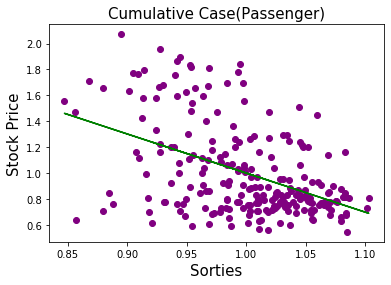

In [553]:
plt.plot(xxxn2pv, yyy2, 'o', c = 'purple')
plt.plot(xxxn2pv,line16.predict(xxxn2pv.reshape(-1,1)), color = 'green')
plt.title('Cumulative Case(Passenger)', fontsize = 15)
plt.xlabel('Sorties', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)

In [554]:
model7 = sm.OLS(yyy2,xxxn2p)
result7=model7.fit()
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     65.82
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           2.83e-14
Time:                        00:58:54   Log-Likelihood:                -54.882
No. Observations:                 235   AIC:                             113.8
Df Residuals:                     233   BIC:                             120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0193      0.373     10.784      0.000       3.285       4.754
운항(편)         -3.0193      0.372     -8.113      0.000      -3.752      -2.286
==============================================================================
Omnibus:                       11.623   Durbin-Watson:                   0.394
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.118
Skew:                           0.552   Prob(JB):                      0.00234
Kurtosis:                       3.139   Cond. No.                         37.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 유가가격 - 주가
Source : Investig.com Crude Oil Contract

In [582]:
yraw1 = pd.read_excel(r'C:\Users\com\[MSB535]\data\대한항공주가.xlsx', index_col = 0)
ypot = yraw1['Price']
y1 = ypot.values
len(y1)

120

In [583]:
yraw2 = pd.read_excel(r'C:\Users\com\[MSB535]\data\아시아나주가.xlsx', index_col = 0)
ypot = yraw2['Price']
y2 = ypot.values
len(y2)

120

In [584]:
oilraw = pd.read_excel(r'C:\Users\com\[MSB535]\data\유가가격.xlsx', index_col = 0)

In [585]:
oilraw1 = oilraw.drop([oilraw.index[76]])

In [586]:
oildata = oilraw1['Price']
oiltable = pd.DataFrame({'유가' : oildata})
x1 = sm.add_constant(oiltable,has_constant='add')
x1v = x1['유가'].values

C:\Users\com\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [587]:
y1 = np.delete(y1,76)
y2 = np.delete(y2,76)

In [588]:
line5 = LinearRegression()
line5.fit(x1v.reshape(-1,1),y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[10, 130, 10000, 100000]

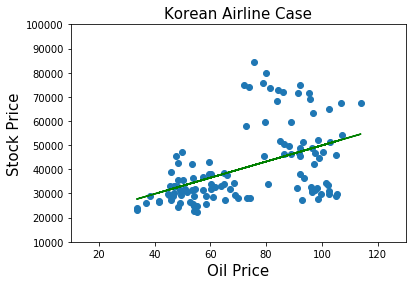

In [589]:
plt.plot(x1v, y1, 'o')
plt.plot(x1v,line5.predict(x1v.reshape(-1,1)), color = 'green')
plt.xlabel('Oil Price', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.title('Korean Airline Case', fontsize = 15)
plt.axis([10, 130,10000,100000])

In [590]:
model7 = sm.OLS(y1,x1)
result7=model7.fit()
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     33.37
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           6.42e-08
Time:                        01:05:04   Log-Likelihood:                -1301.4
No. Observations:                 119   AIC:                             2607.
Df Residuals:                     117   BIC:                             2612.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.642e+04   4384.111      3.745      0.000    7734.936    2.51e+04
유가           335.0069     57.997      5.776      0.000     220.147     449.867
==============================================================================
Omnibus:                       17.687   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.395
Skew:                           0.942   Prob(JB):                     3.73e-05
Kurtosis:                       3.751   Cond. No.                         264.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [579]:
line6 = LinearRegression()
line6.fit(x1.reshape(-1,1),y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[10, 130, 2000, 13000]

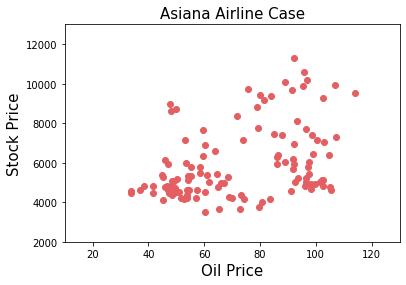

In [601]:
plt.plot(x1, y2, 'o', color = '#e35f62')
plt.plot(x1,line6.predict(x1.reshape(-1,1)), color = 'green')
plt.xlabel('Oil Price', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.title('Asiana Airline Case', fontsize = 15)
plt.axis([10, 130,2000,13000])

In [602]:
x1 = x1/np.mean(x1)
y1 = y1/np.mean(y1)
y2 = y2/np.mean(y2)
xxx = np.concatenate([x1,x1], axis = None)
yyy = np.concatenate([y1,y2], axis = None)

In [603]:
line6 = LinearRegression()
line6.fit(xxx.reshape(-1,1),yyy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Stock Price')

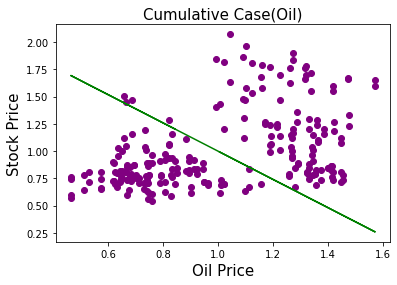

In [604]:
plt.plot(xxx, yyy, 'o', c = 'purple')
plt.plot(xxx,line16.predict(xxx.reshape(-1,1)), color = 'green')
plt.title('Cumulative Case(Oil)', fontsize = 15)
plt.xlabel('Oil Price', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)

### 관광지표 비교
Source : 한국관광공사

In [61]:
tourraw = pd.read_excel(r'C:\Users\com\[MSB535]\data\관광지표.xlsx', index_col = 0)

In [63]:
pop = tourraw['인구총계'].values
cash = tourraw['현금총계'].values

In [64]:
pop = np.delete(pop,76)
cash = np.delete(cash,76)

In [65]:
line7 = LinearRegression()
line8 = LinearRegression()
line9 = LinearRegression()
line10 = LinearRegression()
line7.fit(pop.reshape(-1,1),y1)
line8.fit(cash.reshape(-1,1),y1)
line9.fit(pop.reshape(-1,1),y2)
line10.fit(cash.reshape(-1,1),y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[1400000, 4500000, 10000, 100000]

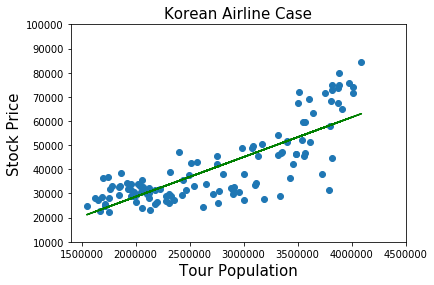

In [66]:
plt.plot(pop, y1, 'o')
plt.plot(pop,line7.predict(pop.reshape(-1,1)), color = 'green')
plt.xlabel('Tour Population', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.title('Korean Airline Case', fontsize = 15)
plt.axis([1400000, 4500000,10000,100000])

[1400000, 4500000, 2000, 13000]

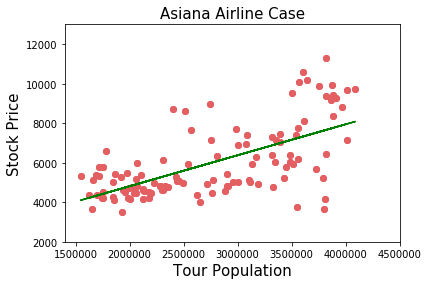

In [67]:
plt.plot(pop, y2, 'o', color = '#e35f62')
plt.plot(pop,line9.predict(pop.reshape(-1,1)), color = 'green')
plt.scatter(pop,y2,color = '#e35f62')
plt.xlabel('Tour Population', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.title('Asiana Airline Case', fontsize = 15)
plt.axis([1400000, 4500000,2000,13000])

Text(0.5, 1.0, 'Korean Airline Case')

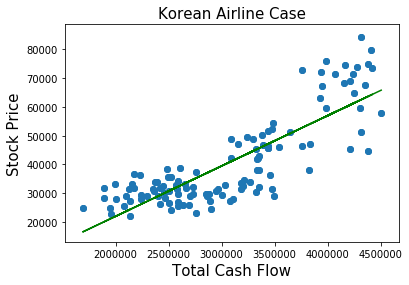

In [68]:
plt.plot(cash, y1, 'o')
plt.plot(cash,line8.predict(cash.reshape(-1,1)), color = 'green')
plt.scatter(cash,y1)
plt.xlabel('Total Cash Flow', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.title('Korean Airline Case', fontsize = 15)
#plt.axis([1400000, 4500000,10000,100000])

Text(0.5, 1.0, 'Asiana Airline Case')

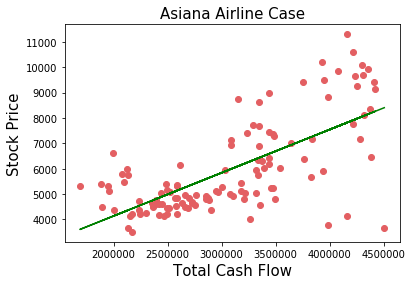

In [69]:
plt.plot(cash, y2, 'o', color = '#e35f62')
plt.plot(cash,line10.predict(cash.reshape(-1,1)), color = 'green')
plt.xlabel('Total Cash Flow', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.title('Asiana Airline Case', fontsize = 15)
#plt.axis([1400000, 4500000,10000,100000])